In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

**1. Take a low-contrast image as an input and perform appropriate transformations to produce a high-contrast image. Draw the histogram of the two images to distinguish the differences.**

Input Low contrast image


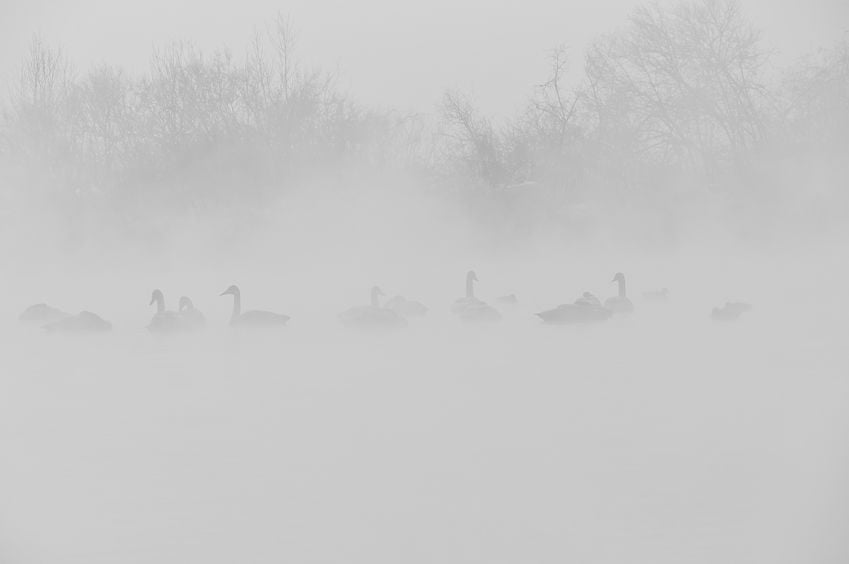

(564, 849)
Output High contrast image:


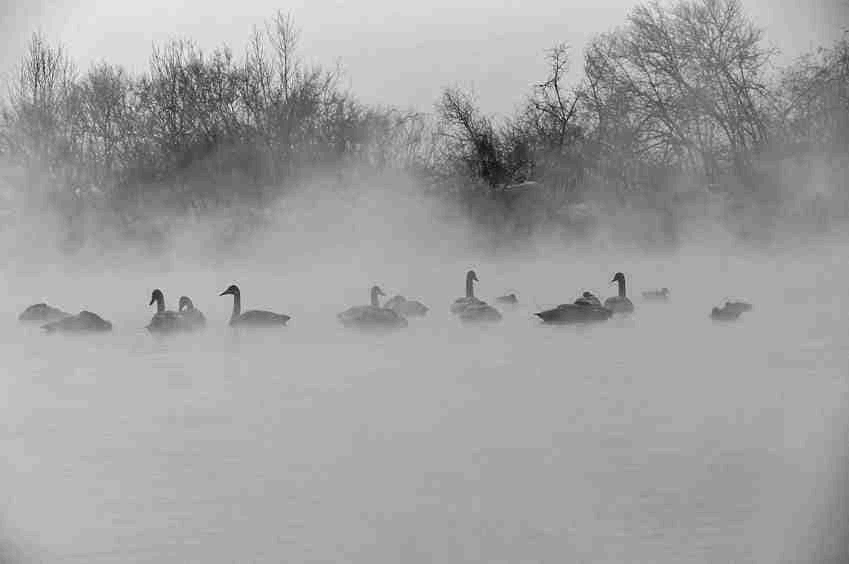

Low contrast image histogram:
Histogram:


<ipython-input-29-71e8c832ccff>:47: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t,hist)


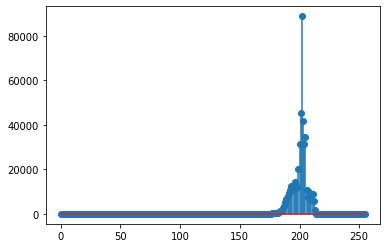

High contrast image histogram:
Histogram:


<ipython-input-29-71e8c832ccff>:66: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t,hist1)


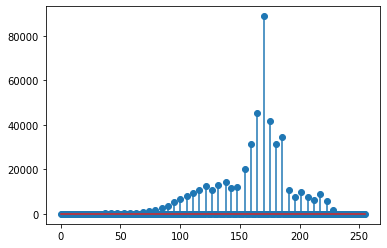

In [ ]:
img=cv2.imread('/content/low_con1.jpg',0)
#img=cv2.imread('/content/low_con2.jpg',0)
print('Input Low contrast image')
cv2_imshow(img)

h,w=img.shape 
print(img.shape)

mx=-100
mn=400


img1=np.zeros([h,w], dtype = int)

for x in range(0,h):
  for y in range(0,w):
   # for z in range(ch):
      if mn>img[x][y]:
        mn=img[x][y]
      if mx<img[x][y]:
        mx=img[x][y]

for x in range(0,h):
  for y in range(0,w):
       img1[x][y]=255*(img[x][y]-mn)/(mx-mn)
       

print("Output High contrast image:")
cv2_imshow(img1)

#histogram
print("Low contrast image histogram:")
hist=[]
for x in range(0,256):
  hist.append(0)

for x in range(h):
  for y in range(w):
    val=img[x][y]
    hist[val]+=1

#print(hist)

t=np.arange(0,256,1)

print("Histogram:")
plt.stem(t,hist)
plt.show()


print("High contrast image histogram:")
hist1=[]
for x in range(0,256):
  hist1.append(0)

for x in range(h):
  for y in range(w):
    val=img1[x][y]
    hist1[val]+=1

#print(hist)

t=np.arange(0,256,1)

print("Histogram:")
plt.stem(t,hist1)
plt.show()



# Discussion:

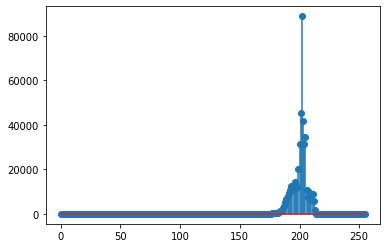

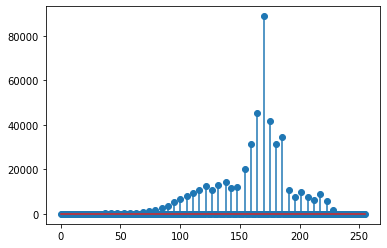

In low contrast image histogram, difference between min-max pixel is low, in high contrast photo this difference is higher.
We performed contrast stretching.
from this high contrast photo, we can see details of photo is higher in high contrast photo gained by contrast stretching



**2.** Segmentation is the process of separating the different regions in an image based on the intensity values meeting some criteria/predicate. Apply any segmentation algorithm to segment an image and find out the difference in segmentation before and after the application of an averaging filter to that image. So you need to segment the image twice before and after averaging out.

In [ ]:
def thresh(img):
   

In [ ]:
#apply average filter in an image & segmentation  thresholding

img=cv2.imread('/content/3.png',0)
print('Input image:')
cv2_imshow(img)

#average filter
filt=[[0.9,0.9,0.9],
      [0.9,0.9,0.9],
      [0.9,0.9,0.9]]

h,w=img.shape

nh=h+2
nw=w+2
padded_img=np.zeros([nh,nw], dtype = int)
for x in range(1,nh):
  for y in range(1,nw):
     padded_img[x][y]=img[x][y]

img1=np.zeros([h,w], dtype = int) 

for i in range(1,h):
  for j in range(1,w):
    val=filt[0][0]*padded_img[i-1][j-1]+filt[0][1]*padded_img[i-1][j]+filt[0][2]*padded_img[i-1][j+1]+filt[1][0]*padded_img[i][j-1]+filt[1][1]*padded_img[i][j]+filt[1][2]*padded_img[i][j+1]+filt[2][0]*padded_img[i+1][j-1]+filt[2][1]*padded_img[i+1][j]+filt[2][2]*padded_img[i+1][j+1]

    img1[i][j]=val


print("After Thresholding Intput:")
thres=140
h,w=image.shape
for x in range(h):
      for y in range(w):
        if img[x][y]>thres:
          img[x][y]=255
        else:
          img[x][y]=0

print('Output by threshold at 140:')

cv2_imshow(img)
#print(padded_img)
print("Average filtering:")
cv2_imshow(img1)
thres=140
h,w=image.shape
for x in range(h):
      for y in range(w):
        if img[x][y]>thres:
          img1[x][y]=255
        else:
          img1[x][y]=0
print("After Average filtering--Output:")
#print(img1)




Discussion:

By applying average filter, main image pixels are averaged out.
Main image got blurred, image lost some sharpness.


by thresholding, we splitted regions of an image, that can be seen as peaks in the histogram plotting. we assumed threshold=140